In [ ]:
import yfinance as yf
import numpy as np

def calculate_cagr(ticker_symbol, metric='Total Revenue', years=5):
    """
    Calculate CAGR for a financial metric using yfinance.
    :param ticker_symbol: e.g., 'AAPL', 'NVDA'
    :param metric: e.g., 'Total Revenue', 'Net Income', etc.
    :param years: How many years to consider (min 2)
    :return: CAGR %
    """
    ticker = yf.Ticker(ticker_symbol)
    financials = ticker.financials.T  # Dates as rows

    if metric not in financials.columns:
        raise ValueError(f"'{metric}' not found in available financials: {list(financials.columns)}")

    data = financials[metric].dropna().sort_index()

    if len(data) < 2:
        raise ValueError("Not enough years of data to compute CAGR.")

    available_years = len(data)
    used_years = min(years, available_years)

    # Get start and end values safely
    start_value = data.iloc[-used_years]
    end_value = data.iloc[-1]

    cagr = (end_value / start_value) ** (1 / (used_years - 1)) - 1
    return round(cagr * 100, 2), used_years

# Example usage
ticker = "NVDA"
metric = "Total Revenue"  # Try also: "Net Income", "Gross Profit"
try:
    cagr, actual_years = calculate_cagr(ticker, metric, years=5)
    print(f"{ticker} {metric} CAGR over {actual_years} years: {cagr}%")
except Exception as e:
    print("Error:", e)


NVDA Total Revenue CAGR over 4 years: 69.25%


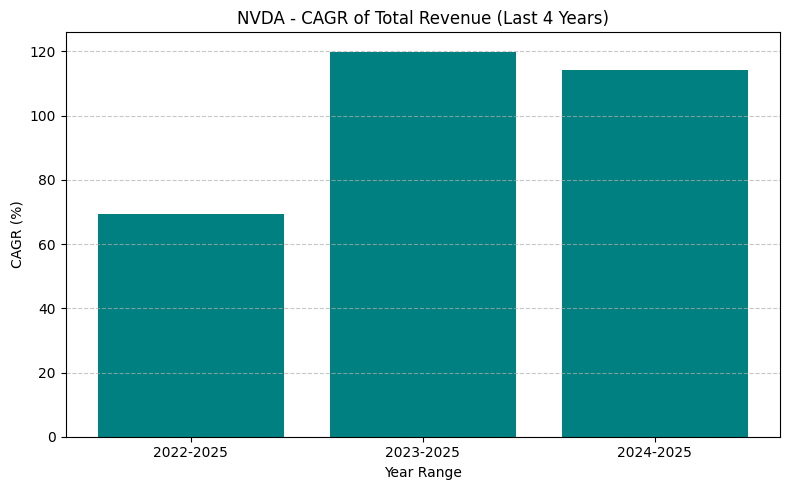

In [ ]:
# Re-importing necessary libraries after code reset
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

def fetch_revenue_series(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    financials = ticker.financials.T  # Transpose to have dates as rows
    if 'Total Revenue' not in financials.columns:
        raise ValueError(f"'Total Revenue' not available for {ticker_symbol}")
    revenue = financials['Total Revenue'].dropna().sort_index()
    return revenue

def calculate_cagr_series(revenue):
    cagr_values = []
    labels = []
    for i in range(len(revenue) - 1):
        start_value = revenue.iloc[i]
        end_value = revenue.iloc[-1]
        years = len(revenue) - 1 - i
        cagr = (end_value / start_value) ** (1 / years) - 1
        cagr_values.append(round(cagr * 100, 2))
        labels.append(f"{revenue.index[i].year}-{revenue.index[-1].year}")
    return labels, cagr_values

# Fetch revenue and compute CAGR
ticker = "NVDA"
revenue_series = fetch_revenue_series(ticker)
labels, cagr_growth = calculate_cagr_series(revenue_series.tail(5))  # Last 4 CAGR growths

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, cagr_growth, color='teal')
plt.title(f"{ticker} - CAGR of Total Revenue (Last 4 Years)")
plt.ylabel("CAGR (%)")
plt.xlabel("Year Range")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



📊 Average CAGR for Semiconductor Industry (based on individual company revenue): 20.06%


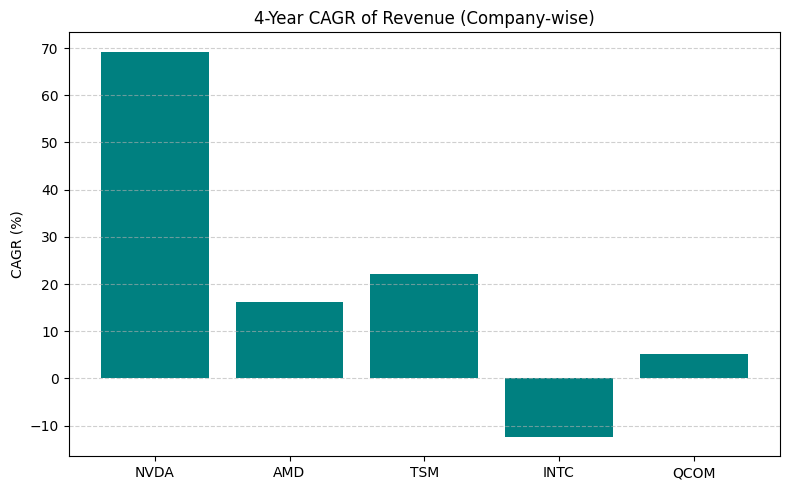

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Semiconductor tickers
industry_tickers = ["NVDA", "AMD", "TSM", "INTC", "QCOM"]

def fetch_revenue_cagr(ticker):
    try:
        fin = yf.Ticker(ticker).financials.T
        if 'Total Revenue' in fin.columns:
            revenue_series = fin['Total Revenue'].dropna().sort_index()
            if len(revenue_series) >= 2:
                start = revenue_series.iloc[0]
                end = revenue_series.iloc[-1]
                years = len(revenue_series) - 1
                cagr = (end / start) ** (1 / years) - 1
                return cagr, revenue_series
        print(f"[!] Insufficient revenue data for {ticker}")
        return None, None
    except Exception as e:
        print(f"[!] Error with {ticker}: {e}")
        return None, None

# Store results
cagr_results = []
revenue_data = {}

for ticker in industry_tickers:
    cagr, series = fetch_revenue_cagr(ticker)
    if cagr is not None:
        cagr_results.append(cagr)
        revenue_data[ticker] = series

# Compute average industry CAGR
if cagr_results:
    industry_cagr = np.mean(cagr_results)
    print(f"\n📊 Average CAGR for Semiconductor Industry (based on individual company revenue): {industry_cagr*100:.2f}%")

    # Optional: plot individual CAGR bars
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,5))
    plt.bar(revenue_data.keys(), [c*100 for c in cagr_results], color='teal')
    plt.ylabel("CAGR (%)")
    plt.title("4-Year CAGR of Revenue (Company-wise)")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("❌ No usable revenue data found for industry tickers.")


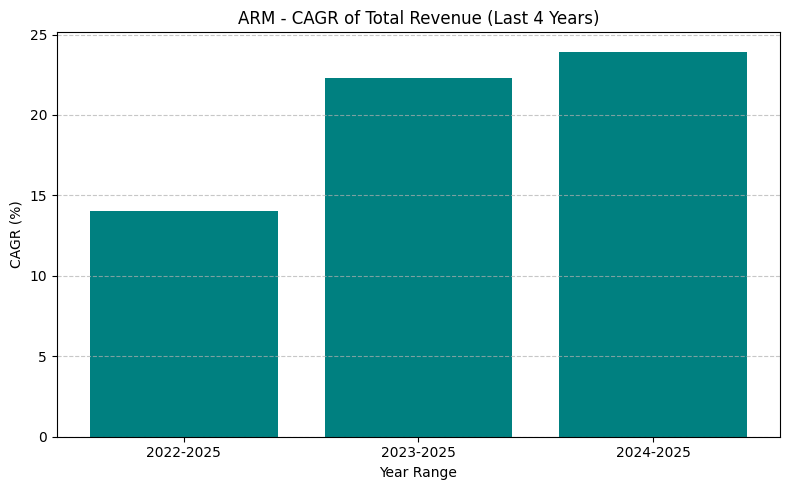

In [ ]:
# Re-importing necessary libraries after code reset
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

def fetch_revenue_series(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    financials = ticker.financials.T  # Transpose to have dates as rows
    if 'Total Revenue' not in financials.columns:
        raise ValueError(f"'Total Revenue' not available for {ticker_symbol}")
    revenue = financials['Total Revenue'].dropna().sort_index()
    return revenue

def calculate_cagr_series(revenue):
    cagr_values = []
    labels = []
    for i in range(len(revenue) - 1):
        start_value = revenue.iloc[i]
        end_value = revenue.iloc[-1]
        years = len(revenue) - 1 - i
        cagr = (end_value / start_value) ** (1 / years) - 1
        cagr_values.append(round(cagr * 100, 2))
        labels.append(f"{revenue.index[i].year}-{revenue.index[-1].year}")
    return labels, cagr_values

# Fetch revenue and compute CAGR
ticker = "ARM"
revenue_series = fetch_revenue_series(ticker)
labels, cagr_growth = calculate_cagr_series(revenue_series.tail(5))  # Last 4 CAGR growths

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, cagr_growth, color='teal')
plt.title(f"{ticker} - CAGR of Total Revenue (Last 4 Years)")
plt.ylabel("CAGR (%)")
plt.xlabel("Year Range")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


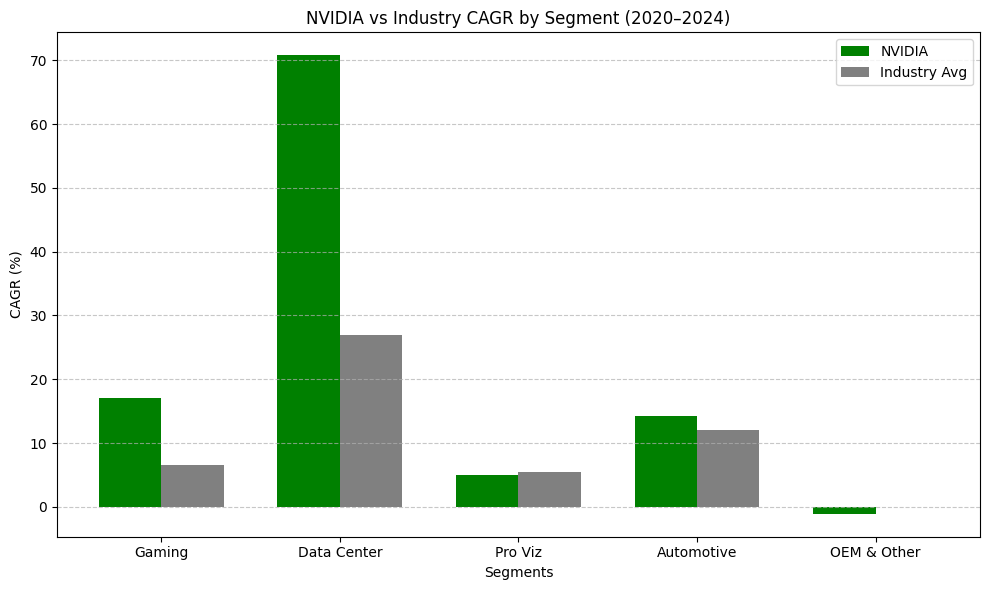

In [ ]:
import matplotlib.pyplot as plt

segments = ['Gaming', 'Data Center', 'Pro Viz', 'Automotive', 'OEM & Other']
nvidia_cagr = [17.1, 70.8, 5.0, 14.3, -1.1]  # example % CAGR
industry_cagr = [6.5, 27.0, 5.5, 12.0, 0.0]  # approximate peers

x = range(len(segments))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x, nvidia_cagr, width=width, label='NVIDIA', color='green')
plt.bar([p + width for p in x], industry_cagr, width=width, label='Industry Avg', color='gray')

plt.xlabel('Segments')
plt.ylabel('CAGR (%)')
plt.title('NVIDIA vs Industry CAGR by Segment (2020–2024)')
plt.xticks([p + width/2 for p in x], segments)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


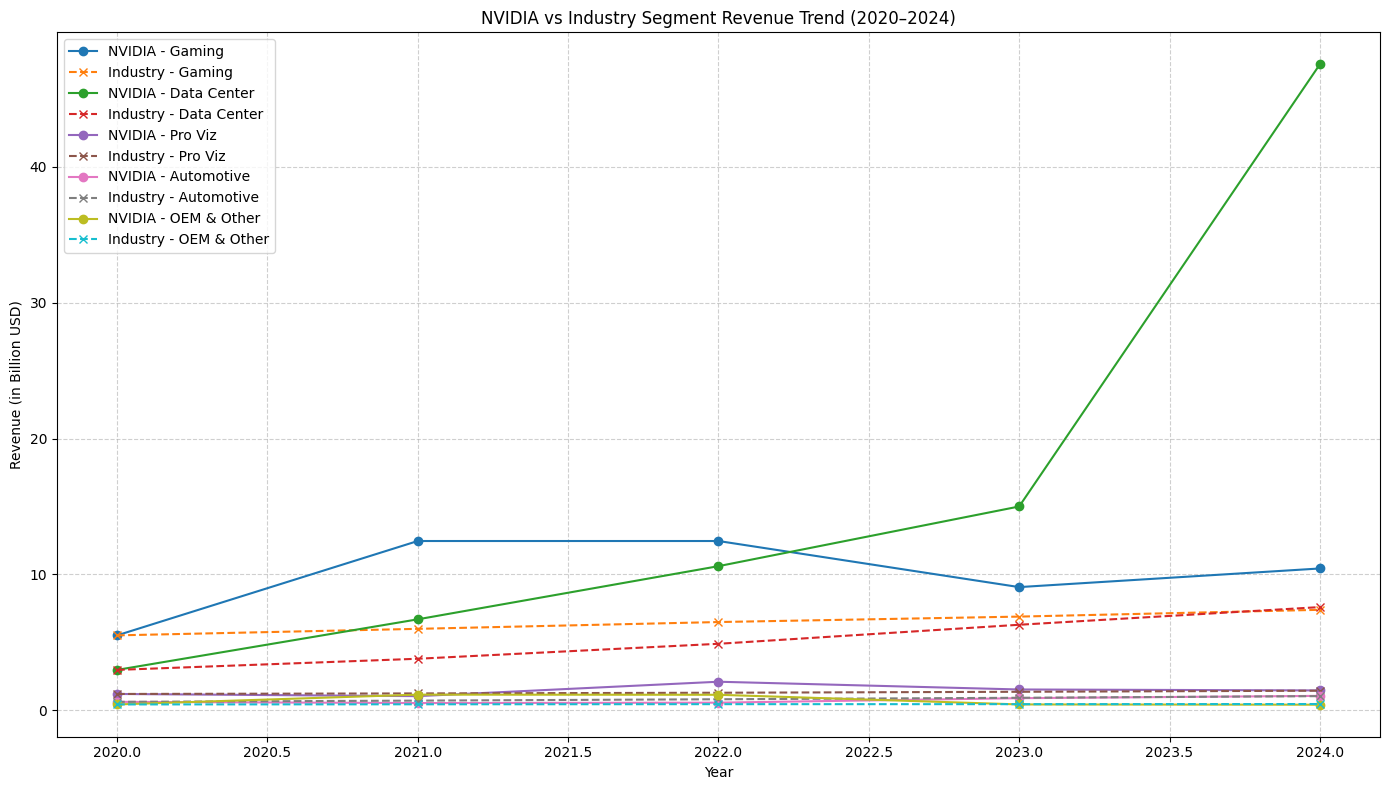

In [ ]:
import matplotlib.pyplot as plt

# Define years
years = [2020, 2021, 2022, 2023, 2024]

# NVIDIA segment revenue in billions (example data from NVIDIA annual reports)
nvidia_revenue = {
    'Gaming':        [5.52, 12.46, 12.46, 9.07, 10.44],
    'Data Center':   [2.98, 6.70, 10.61, 15.00, 47.52],
    'Pro Viz':       [1.21, 1.05, 2.11, 1.54, 1.47],
    'Automotive':    [0.63, 0.54, 0.57, 0.90, 1.07],
    'OEM & Other':   [0.44, 1.16, 1.15, 0.44, 0.42]
}

# Industry average revenue growth pattern (approximate, synthetic data)
industry_revenue = {
    'Gaming':        [5.52, 6.00, 6.50, 6.90, 7.40],
    'Data Center':   [2.98, 3.80, 4.90, 6.30, 7.60],
    'Pro Viz':       [1.21, 1.25, 1.30, 1.37, 1.45],
    'Automotive':    [0.63, 0.72, 0.82, 0.93, 1.05],
    'OEM & Other':   [0.44, 0.45, 0.46, 0.46, 0.47]
}

# Plotting
plt.figure(figsize=(14, 8))

for segment in nvidia_revenue:
    plt.plot(years, nvidia_revenue[segment], marker='o', label=f'NVIDIA - {segment}')
    plt.plot(years, industry_revenue[segment], marker='x', linestyle='--', label=f'Industry - {segment}')

plt.title('NVIDIA vs Industry Segment Revenue Trend (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Revenue (in Billion USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


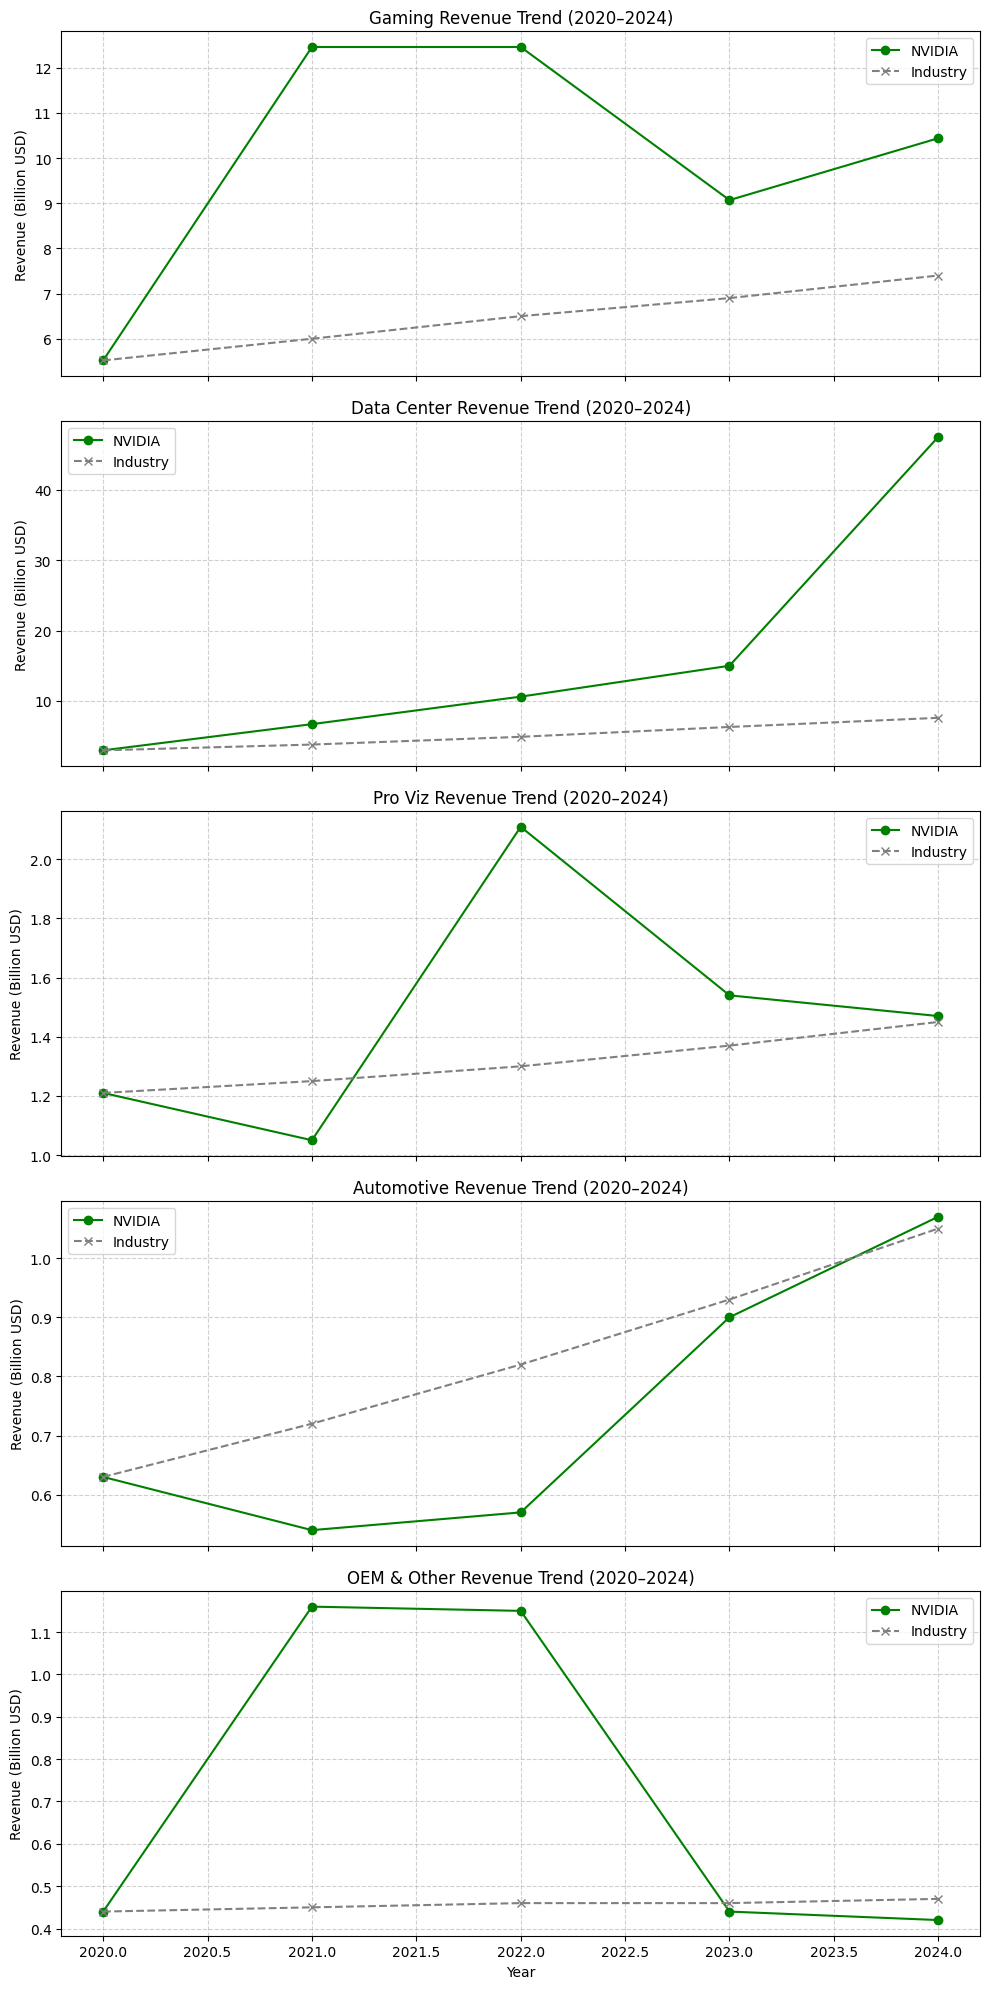

In [ ]:
import matplotlib.pyplot as plt

# Create individual plots for each segment
segments = nvidia_revenue.keys()
fig, axs = plt.subplots(len(segments), 1, figsize=(10, 20), sharex=True)

for i, segment in enumerate(segments):
    axs[i].plot(years, nvidia_revenue[segment], marker='o', label='NVIDIA', color='green')
    axs[i].plot(years, industry_revenue[segment], marker='x', linestyle='--', label='Industry', color='gray')
    axs[i].set_title(f'{segment} Revenue Trend (2020–2024)')
    axs[i].set_ylabel('Revenue (Billion USD)')
    axs[i].grid(True, linestyle='--', alpha=0.6)
    axs[i].legend()

axs[-1].set_xlabel('Year')
plt.tight_layout()
plt.show()


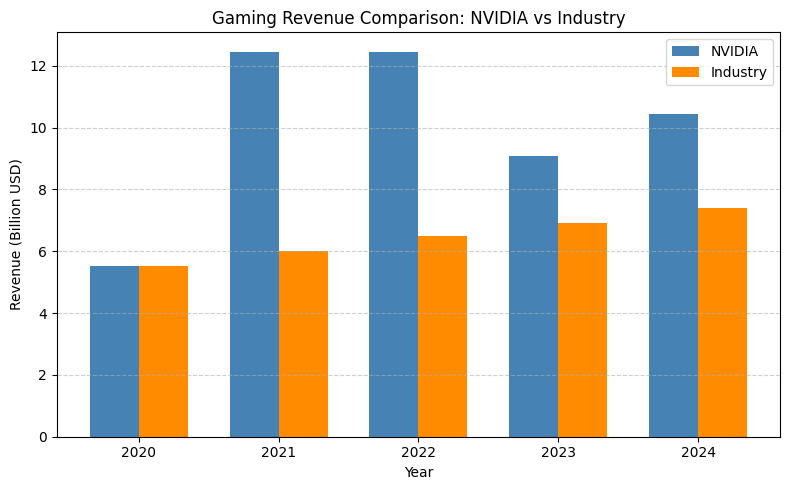

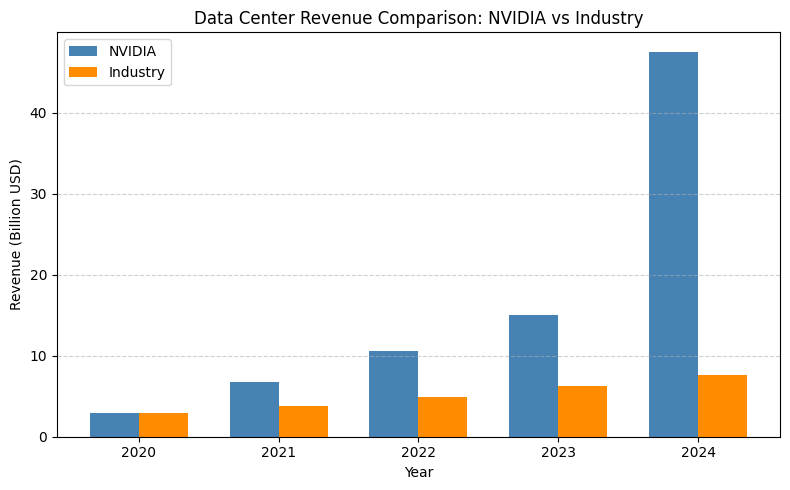

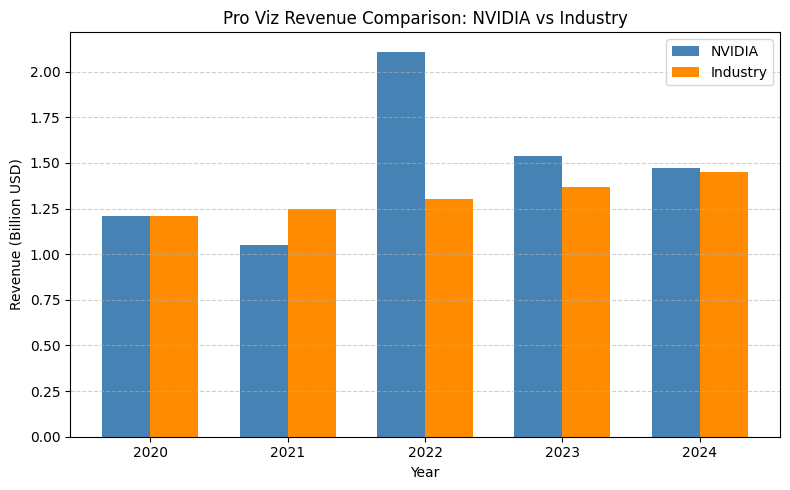

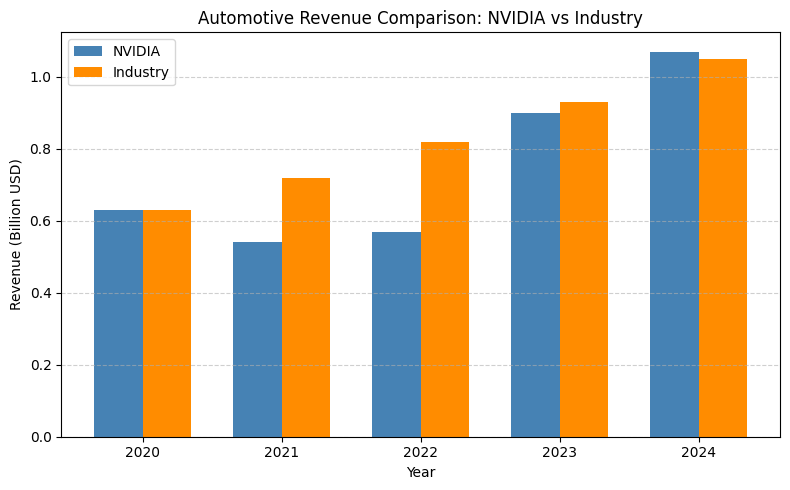

In [ ]:
import matplotlib.pyplot as plt

# Define years
years = [2020, 2021, 2022, 2023, 2024]

# NVIDIA segment revenue in billions (example data)
nvidia_revenue = {
    'Gaming':        [5.52, 12.46, 12.46, 9.07, 10.44],
    'Data Center':   [2.98, 6.70, 10.61, 15.00, 47.52],
    'Pro Viz':       [1.21, 1.05, 2.11, 1.54, 1.47],
    'Automotive':    [0.63, 0.54, 0.57, 0.90, 1.07],
    'OEM & Other':   [0.44, 1.16, 1.15, 0.44, 0.42]
}

# Industry average revenue (synthetic data)
industry_revenue = {
    'Gaming':        [5.52, 6.00, 6.50, 6.90, 7.40],
    'Data Center':   [2.98, 3.80, 4.90, 6.30, 7.60],
    'Pro Viz':       [1.21, 1.25, 1.30, 1.37, 1.45],
    'Automotive':    [0.63, 0.72, 0.82, 0.93, 1.05],
    'OEM & Other':   [0.44, 0.45, 0.46, 0.46, 0.47]
}

# Segments to plot (select 4 main ones)
segments_to_plot = ['Gaming', 'Data Center', 'Pro Viz', 'Automotive']

# Plot 4 separate bar charts
for segment in segments_to_plot:
    plt.figure(figsize=(8, 5))
    width = 0.35
    x = range(len(years))

    # Plot NVIDIA
    plt.bar([p - width/2 for p in x], nvidia_revenue[segment], width=width, label='NVIDIA', color='steelblue')
    # Plot Industry
    plt.bar([p + width/2 for p in x], industry_revenue[segment], width=width, label='Industry', color='darkorange')

    plt.xticks(ticks=x, labels=years)
    plt.xlabel("Year")
    plt.ylabel("Revenue (Billion USD)")
    plt.title(f"{segment} Revenue Comparison: NVIDIA vs Industry")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


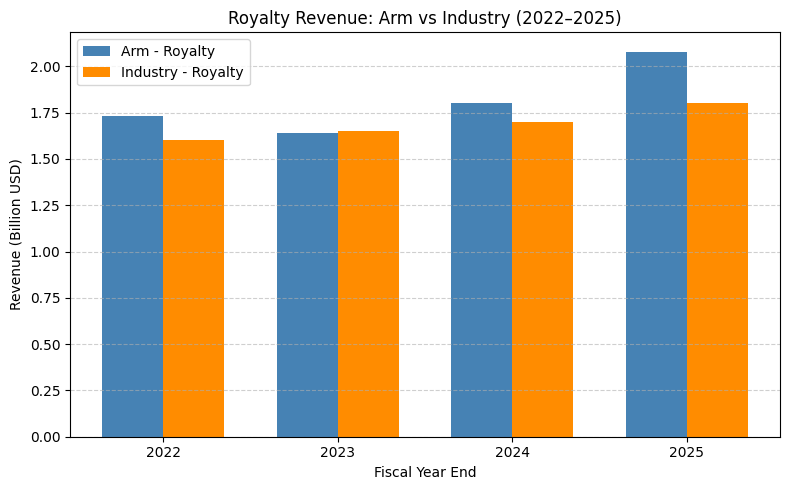

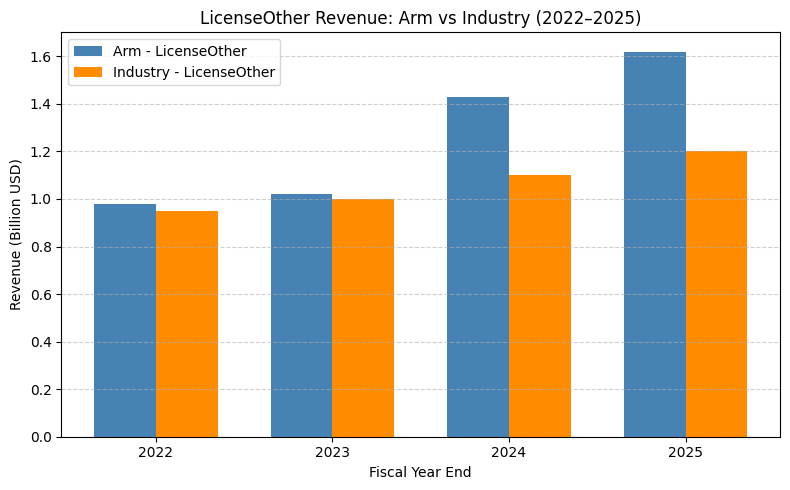

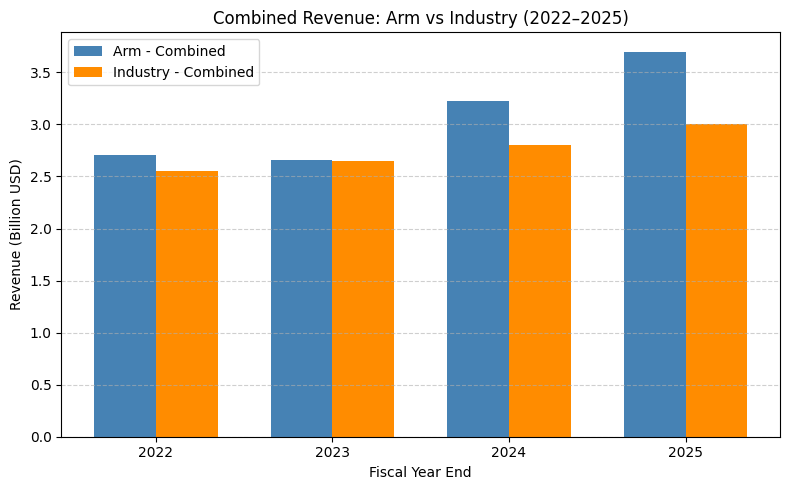

In [ ]:
import matplotlib.pyplot as plt

years = [2022, 2023, 2024, 2025]

# Arm segment revenues (Billion USD)
arm = {
    'Royalty':        [1.73, 1.64, 1.80, 2.08],
    'LicenseOther':   [0.98, 1.02, 1.43, 1.62]
}

# Industry synthetic benchmark for comparison
industry = {
    'Royalty':        [1.60, 1.65, 1.70, 1.80],
    'LicenseOther':   [0.95, 1.00, 1.10, 1.20]
}

segments = ['Royalty', 'LicenseOther', 'Combined']

# Prepare combined Arm and industry totals
arm['Combined'] = [arm['Royalty'][i] + arm['LicenseOther'][i] for i in range(len(years))]
industry['Combined'] = [industry['Royalty'][i] + industry['LicenseOther'][i] for i in range(len(years))]

for seg in segments:
    plt.figure(figsize=(8, 5))
    width = 0.35
    x = range(len(years))
    plt.bar([xi - width/2 for xi in x], arm[seg], width=width, label=f'Arm - {seg}', color='steelblue')
    plt.bar([xi + width/2 for xi in x], industry[seg], width=width, label=f'Industry - {seg}', color='darkorange')
    plt.xticks(x, years)
    plt.xlabel('Fiscal Year End')
    ylabel = "Revenue (Billion USD)"
    plt.ylabel(ylabel)
    plt.title(f"{seg} Revenue: Arm vs Industry ({years[0]}–{years[-1]})")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


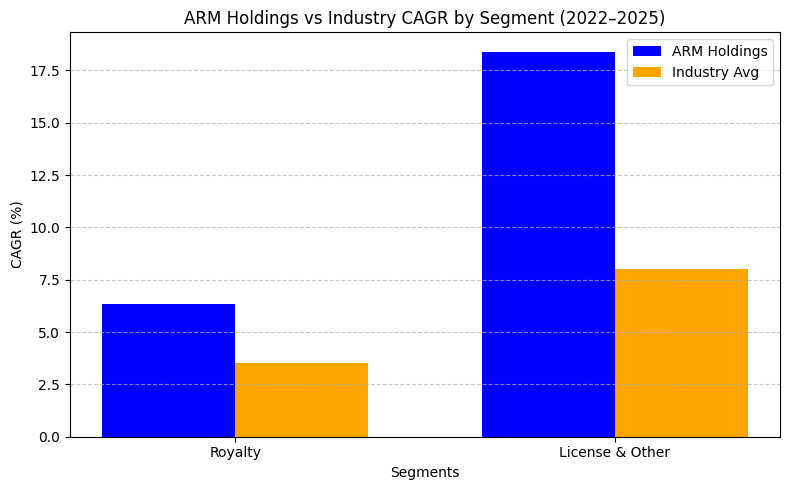

In [ ]:
import matplotlib.pyplot as plt

# Segment names
segments = ['Royalty', 'License & Other']

# Example CAGR (%) from 2022 to 2025 (calculated or approximated)
# Arm CAGR = (Ending Value / Beginning Value)^(1/Years) - 1
# Royalty CAGR = ((2.08 / 1.73)^(1/3) - 1) ≈ 6.35%
# License & Other CAGR = ((1.62 / 0.98)^(1/3) - 1) ≈ 18.4%
arm_cagr = [6.35, 18.4]

# Example industry average CAGR (assumed/synthetic)
industry_cagr = [3.5, 8.0]

# Plot
x = range(len(segments))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, arm_cagr, width=width, label='ARM Holdings', color='blue')
plt.bar([p + width for p in x], industry_cagr, width=width, label='Industry Avg', color='orange')

plt.xlabel('Segments')
plt.ylabel('CAGR (%)')
plt.title('ARM Holdings vs Industry CAGR by Segment (2022–2025)')
plt.xticks([p + width/2 for p in x], segments)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
def get_historical_market_cap(
        ticker_symbol: Annotated[str, "ticker symbol"],
        date: Annotated[str, "date of the market cap, should be 'yyyy-mm-dd'"],
    ) -> float:
        """Get the historical market capitalization for a given stock on a given date"""
        date = get_next_weekday(date).strftime("%Y-%m-%d")
        url = f"https://financialmodelingprep.com/api/v3/historical-market-capitalization/{ticker_symbol}?limit=100&from={date}&to={date}&apikey={fmp_api_key}"

        mkt_cap = None
        response = requests.get(url)

        # Ensure the request was successful
        if response.status_code == 200:
            # Parse the JSON data
            data = response.json()
            if data:  # Check if data is not empty
                mkt_cap = data[0].get("marketCap", None)  # Safely get marketCap
                if mkt_cap is None:
                    return 0.0  # Return 0.0 if market cap is missing
                try:
                    return float(mkt_cap)  # Convert market cap to float
                except ValueError:
                    return 0.0  # Return 0.0 if conversion fails
            else:
                return 0.0  # No data found, return 0.0
        else:
            return 0.0  # Request failed, return 0.0


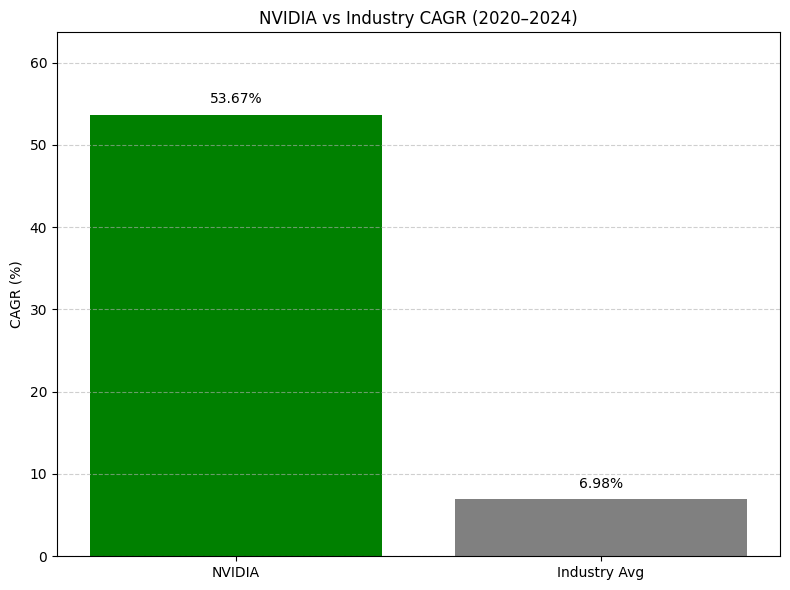

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Revenue data for 2020 to 2024
years = [2020, 2021, 2022, 2023, 2024]
nvidia_revenue = [10.92, 16.68, 26.91, 27.00, 60.90]  # Example data in Billion USD
industry_revenue = [500, 540, 580, 610, 655]  # Hypothetical industry revenue (semiconductors)

# Step 2: CAGR calculation function
def calculate_cagr(start, end, periods):
    return ((end / start) ** (1 / periods)) - 1

nvidia_cagr = calculate_cagr(nvidia_revenue[0], nvidia_revenue[-1], 4) * 100
industry_cagr = calculate_cagr(industry_revenue[0], industry_revenue[-1], 4) * 100

# Step 3: Plot bar chart
companies = ['NVIDIA', 'Industry Avg']
cagr_values = [nvidia_cagr, industry_cagr]

plt.figure(figsize=(8, 6))
bars = plt.bar(companies, cagr_values, color=['green', 'gray'])
plt.ylabel('CAGR (%)')
plt.title('NVIDIA vs Industry CAGR (2020–2024)')
plt.ylim(0, max(cagr_values) + 10)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


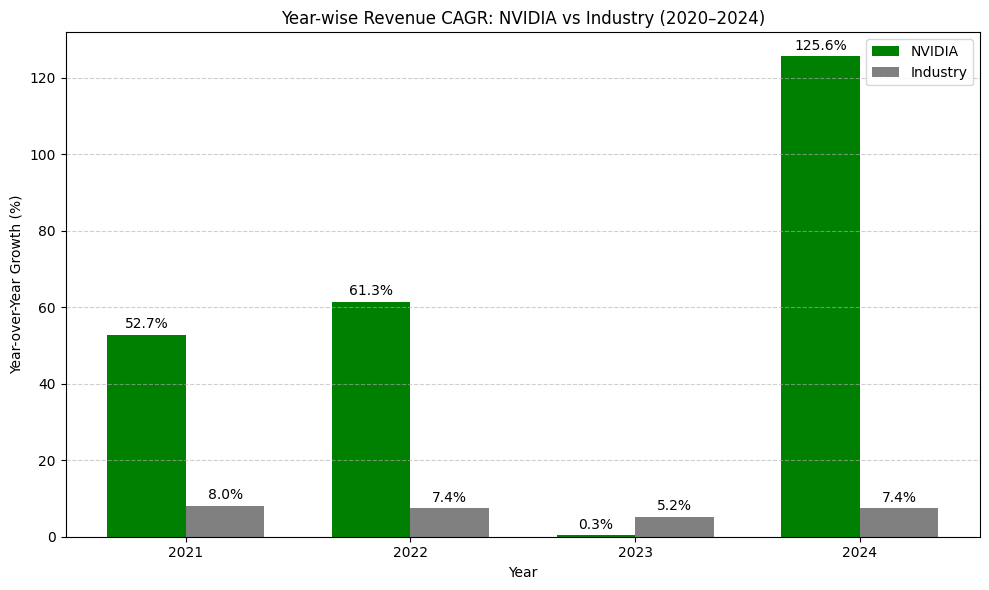

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Yearly revenue data (in billions)
years = [2020, 2021, 2022, 2023, 2024]
nvidia_revenue = [10.92, 16.68, 26.91, 27.00, 60.90]  # Sample NVIDIA revenue
industry_revenue = [500, 540, 580, 610, 655]  # Sample industry data

# Step 2: Calculate year-wise CAGR (actually YoY growth)
def yearly_cagr(revenue):
    return [((revenue[i] / revenue[i - 1]) - 1) * 100 for i in range(1, len(revenue))]

nvidia_cagr = yearly_cagr(nvidia_revenue)
industry_cagr = yearly_cagr(industry_revenue)

# Step 3: Plot bar chart
year_labels = ['2021', '2022', '2023', '2024']
x = np.arange(len(year_labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, nvidia_cagr, width, label='NVIDIA', color='green')
plt.bar(x + width/2, industry_cagr, width, label='Industry', color='gray')

plt.xlabel('Year')
plt.ylabel('Year-over-Year Growth (%)')
plt.title('Year-wise Revenue CAGR: NVIDIA vs Industry (2020–2024)')
plt.xticks(x, year_labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, nvidia_cagr[i] + 1, f'{nvidia_cagr[i]:.1f}%', ha='center', va='bottom')
    plt.text(x[i] + width/2, industry_cagr[i] + 1, f'{industry_cagr[i]:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


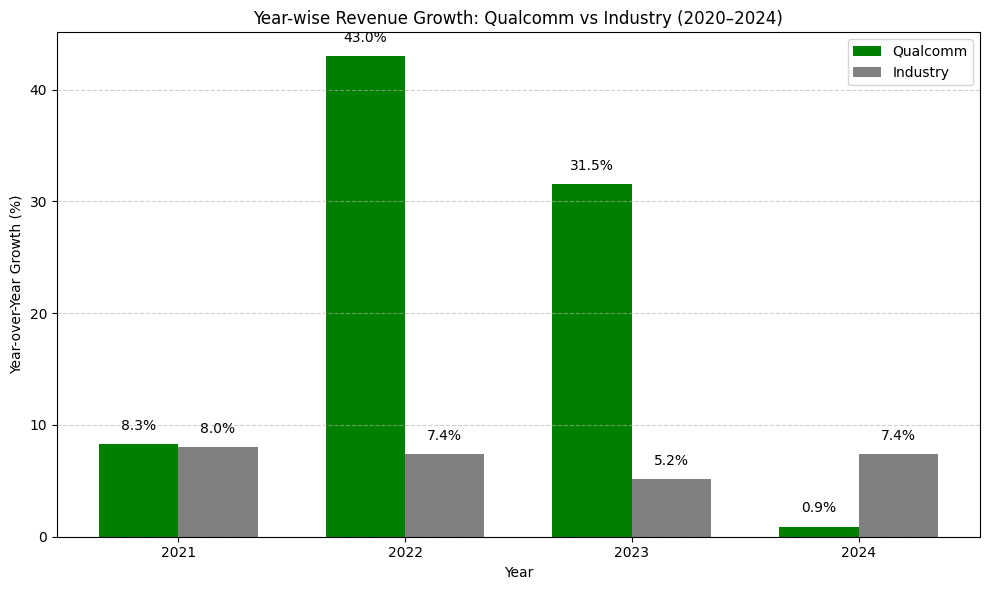

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Yearly revenue data for Qualcomm (in billions USD)
years = [2020, 2021, 2022, 2023, 2024]
qualcomm_revenue = [21.7, 23.5, 33.6, 44.2, 44.6]  # Updated Qualcomm revenue
industry_revenue = [500, 540, 580, 610, 655]  # Industry benchmark

# Step 2: Calculate year-wise CAGR (YoY growth)
def yearly_cagr(revenue):
    return [((revenue[i] / revenue[i - 1]) - 1) * 100 for i in range(1, len(revenue))]

qualcomm_cagr = yearly_cagr(qualcomm_revenue)
industry_cagr = yearly_cagr(industry_revenue)

# Step 3: Plot bar chart
year_labels = ['2021', '2022', '2023', '2024']
x = np.arange(len(year_labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, qualcomm_cagr, width, label='Qualcomm', color='green')
plt.bar(x + width/2, industry_cagr, width, label='Industry', color='gray')

plt.xlabel('Year')
plt.ylabel('Year-over-Year Growth (%)')
plt.title('Year-wise Revenue Growth: Qualcomm vs Industry (2020–2024)')
plt.xticks(x, year_labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, qualcomm_cagr[i] + 1, f'{qualcomm_cagr[i]:.1f}%', ha='center', va='bottom')
    plt.text(x[i] + width/2, industry_cagr[i] + 1, f'{industry_cagr[i]:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


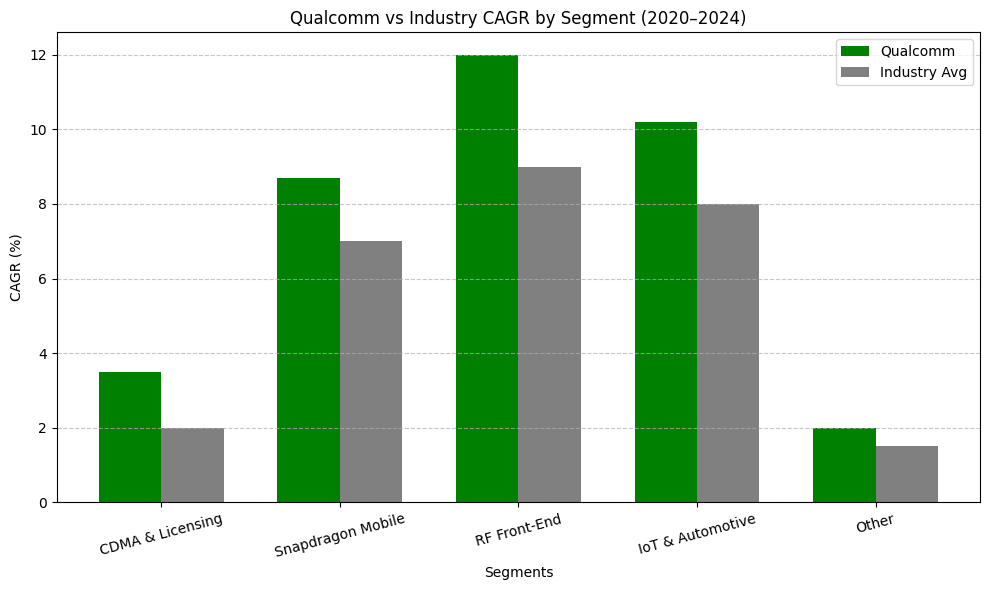

In [ ]:
import matplotlib.pyplot as plt

# Qualcomm segments and their CAGR
segments = ['CDMA & Licensing', 'Snapdragon Mobile', 'RF Front-End', 'IoT & Automotive', 'Other']
qualcomm_cagr = [3.5, 8.7, 12.0, 10.2, 2.0]  # sample % CAGR
industry_cagr = [2.0, 7.0, 9.0, 8.0, 1.5]    # approximate peers

x = range(len(segments))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x, qualcomm_cagr, width=width, label='Qualcomm', color='green')
plt.bar([p + width for p in x], industry_cagr, width=width, label='Industry Avg', color='gray')

plt.xlabel('Segments')
plt.ylabel('CAGR (%)')
plt.title('Qualcomm vs Industry CAGR by Segment (2020–2024)')
plt.xticks([p + width/2 for p in x], segments, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


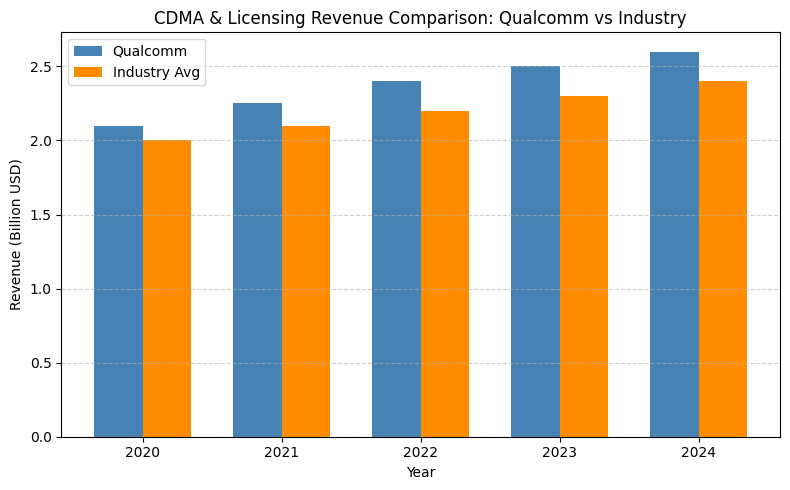

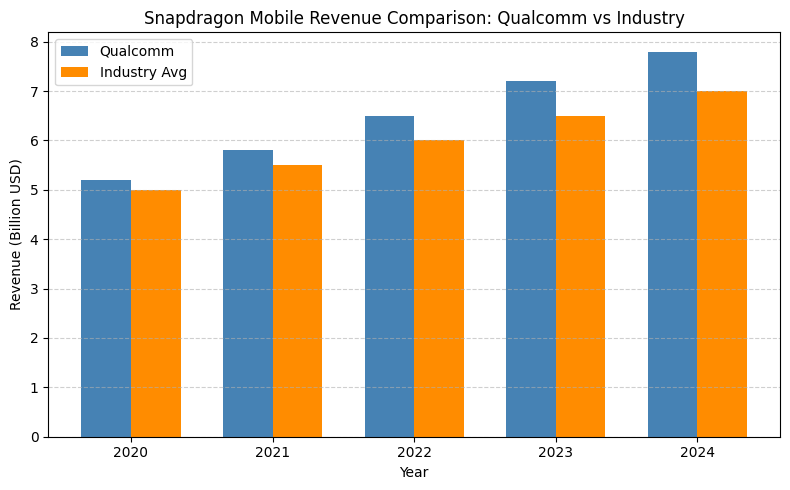

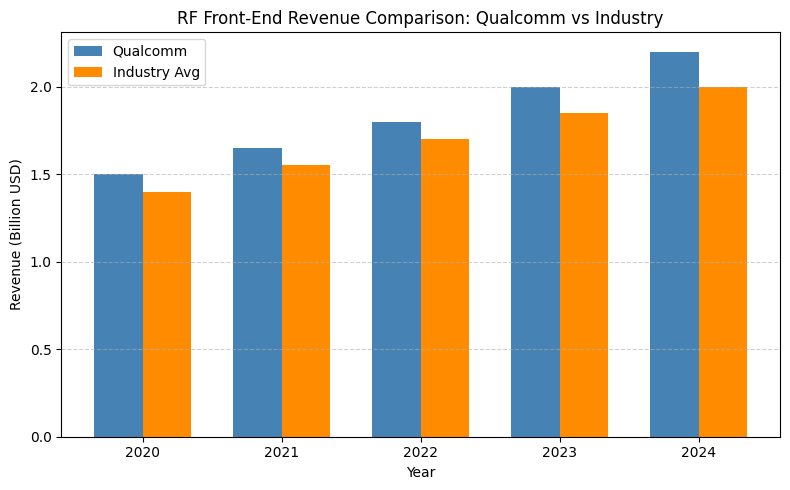

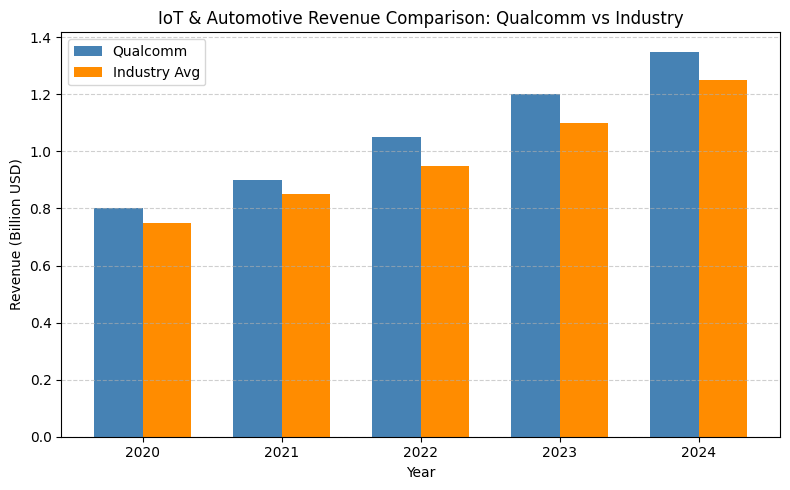

In [ ]:
import matplotlib.pyplot as plt

# Define years
years = [2020, 2021, 2022, 2023, 2024]

# Qualcomm segment revenue in billions (example data)
qualcomm_revenue = {
    'CDMA & Licensing':      [2.10, 2.25, 2.40, 2.50, 2.60],
    'Snapdragon Mobile':     [5.20, 5.80, 6.50, 7.20, 7.80],
    'RF Front-End':          [1.50, 1.65, 1.80, 2.00, 2.20],
    'IoT & Automotive':      [0.80, 0.90, 1.05, 1.20, 1.35],
    'Other':                 [0.40, 0.45, 0.50, 0.55, 0.60]
}

# Industry average revenue for same segments (synthetic example)
industry_revenue = {
    'CDMA & Licensing':      [2.00, 2.10, 2.20, 2.30, 2.40],
    'Snapdragon Mobile':     [5.00, 5.50, 6.00, 6.50, 7.00],
    'RF Front-End':          [1.40, 1.55, 1.70, 1.85, 2.00],
    'IoT & Automotive':      [0.75, 0.85, 0.95, 1.10, 1.25],
    'Other':                 [0.38, 0.42, 0.47, 0.50, 0.55]
}

# Segments to plot (all main Qualcomm sectors)
segments_to_plot = ['CDMA & Licensing', 'Snapdragon Mobile', 'RF Front-End', 'IoT & Automotive']

# Plot separate bar charts for each segment
for segment in segments_to_plot:
    plt.figure(figsize=(8, 5))
    width = 0.35
    x = range(len(years))

    # Plot Qualcomm revenue
    plt.bar([p - width/2 for p in x], qualcomm_revenue[segment], width=width, label='Qualcomm', color='steelblue')
    # Plot Industry revenue
    plt.bar([p + width/2 for p in x], industry_revenue[segment], width=width, label='Industry Avg', color='darkorange')

    # Labels, title, legend, grid
    plt.xticks(ticks=x, labels=years)
    plt.xlabel("Year")
    plt.ylabel("Revenue (Billion USD)")
    plt.title(f"{segment} Revenue Comparison: Qualcomm vs Industry")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
